# Lending Club Case Study

***

### What is the business objective ?

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

####  Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import re

#Visualisation
import seaborn as sns             
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option("display.max_columns", 500)

#### Loading the data into dataframe

In [2]:
# Read the loan file and explore the data
loan_df = pd.read_csv("../datasets/loan.csv", low_memory=False)

In [3]:
print(loan_df.shape)

# Display the top 5 rows 
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Display the last 5 rows 
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 1: Data Cleaning

#### 1.1 Missing values analysis

In [5]:
print(loan_df.dtypes)
print()
print(loan_df.count())

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [6]:
# summing up the missing values (column-wise)
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# summing up the missing values (row-wise)
loan_df.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [8]:
# Check whether any row having all missing values
loan_df.isnull().all(axis=1).sum()

0

In [9]:
# Checking the percentage of missing columns in the dataset
round(100 * (loan_df.isnull().sum() / len(loan_df.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Here we can see that certain number of columns has got a large percentage of null values. So we are removing columns which contains null value percentage of 60 and more.

In [10]:
# Find all the columns which contains more than or equal to 60% as null values
missing_columns = loan_df.columns[round(100 * (loan_df.isnull().sum() / len(loan_df.index)), 2) > 60]

In [11]:
# Drop all those columns having large null values as column values
loan_df = loan_df.drop(missing_columns, axis=1)
loan_df.shape

(39717, 54)

In [12]:
# Re-checking the percentage of missing columns in the dataset to confirm the drop
round(100 * (loan_df.isnull().sum() / len(loan_df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### 1.2 Features(Columns) Analysis:

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

We can eliminate the features which are not predictors of default at the time of loan application, randomly generated columns and also few redundant columns.

1. id — randomly generated field for unique identification purposes only.
2. member_id — randomly generated field for identification purposes only.
3. int_rate — This is redundant column as grade column conveys same information.(Grading will be given based on the interest rate)
4. emp_title — requires other data and a lot of processing to become potentially useful
5. zip_code – Redundant with the addr_state column, also only the first 3 digits of the 5 digit zip code are visible
6. addr_state - may not depend on location as its in financial domain
7. desc - it contains loan description provided by the borrower and it won't be useful for analysis
8. url - it contains a link which can only be accessed with an investor account
9. last_credit_pull_d - Irrelevant for approval
10. Columns with values generated after loan is approved:
    1. total_rec_int
    2. total_rec_late_fee
    3. recoveries
    4. collection_recovery_fee
    5. last_pymnt_d
    6. last_pymnt_amnt
    7. total_rec_prncp
    8. total_pymnt_inv
    9. total_pymnt
    10. out_prncp_inv
    11. out_prncp
    12. funded_amnt_inv
    13. funded_amnt
    14. issue_d
    15. revol_bal

In [13]:
DelColumns = ['id','member_id','int_rate','emp_title','zip_code','desc','total_rec_int','total_rec_late_fee','recoveries',
              'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','total_rec_prncp','total_pymnt_inv','total_pymnt',
              'out_prncp_inv','out_prncp','funded_amnt_inv','funded_amnt','issue_d','url','addr_state','last_credit_pull_d','revol_bal']
DelColumns

['id',
 'member_id',
 'int_rate',
 'emp_title',
 'zip_code',
 'desc',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'total_rec_prncp',
 'total_pymnt_inv',
 'total_pymnt',
 'out_prncp_inv',
 'out_prncp',
 'funded_amnt_inv',
 'funded_amnt',
 'issue_d',
 'url',
 'addr_state',
 'last_credit_pull_d',
 'revol_bal']

In [14]:
# let's now remove the behaviour variables from analysis
loan_df = loan_df.drop(DelColumns, axis=1)

In [15]:
round(100 * (loan_df.isnull().sum() / len(loan_df.index)), 2)

loan_amnt                     0.00
term                          0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
title                         0.03
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_util                    0.13
total_acc                     0.00
initial_list_status           0.00
collections_12_mths_ex_med    0.14
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
chargeoff_within_12_mths      0.14
delinq_amnt                   0.00
pub_rec_bankruptcies

In [16]:
# Unique value and its count for title
loan_df.title.value_counts()

Debt Consolidation                       2184
Debt Consolidation Loan                  1729
Personal Loan                             659
Consolidation                             517
debt consolidation                        505
                                         ... 
Final Credit Card Payoff                    1
Consolidate debt single fixed payment       1
need rehab money                            1
Investment into the future                  1
Just Say No to Credit Cards                 1
Name: title, Length: 19615, dtype: int64

In [17]:
# Unique value and its count for title
loan_df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

Column ```title``` column has 19615 unique values describing the loan by the borrower, this column is derived from ```purpose``` column which has 14 unique values. We can choose to drop ```title``` columns as we can use purpose column for our analysis.

In [18]:
loan_df = loan_df.drop(["title"], axis=1)

Columns ```emp_length``` and ```emp_title``` are required for analysis and the percentage of missing values are also very less, ```2.71%``` and ```6.19%``` respectively. So we continue to keep the columns and remove null values

In [19]:
# Unique value and its count for pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
# Unique value and its count for revol_util
loan_df.revol_util.value_counts(dropna=False)

0%        977
0.20%      63
63%        62
40.70%     58
0.10%      58
         ... 
49.63%      1
18.82%      1
32.04%      1
29.53%      1
8.01%       1
Name: revol_util, Length: 1090, dtype: int64

In [21]:
# Unique value and its count for collections_12_mths_ex_med
loan_df.collections_12_mths_ex_med.value_counts(dropna=False)

0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

In [22]:
# Unique value and its count for chargeoff_within_12_mths
loan_df.chargeoff_within_12_mths.value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

In [23]:
# Unique value and its count for tax_liens
loan_df.tax_liens.value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

For columns, ```tax_liens```, ```chargeoff_within_12_mths```, ```collections_12_mths_ex_med```, it contains only one unique value and it won't help us in the analysis.

In [24]:
# Removing columns tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med 
loan_df = loan_df.drop(["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"], axis=1)

For columns, ```pub_rec_bankruptcies```, ```last_pymnt_d```, ```revol_util``` only a small amount of data contains null values, and we don't want to introduce bias into that. So we can remove those rows having null values

In [25]:
# pub_rec_bankruptcies, last_pymnt_d - Removing null values as it contains only small amount
loan_df  = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [26]:
# Only two columns with very less null values, so we are  removing null from those columns (revol_util, title)
loan_df  = loan_df[~loan_df.revol_util.isnull()]

In [27]:
#Removing the rows having null values for emp_length and emp_title
loan_df = loan_df[~loan_df.emp_length.isnull()]

In [28]:
round(100 * (loan_df.isnull().sum() / len(loan_df.index)), 2)

loan_amnt               0.0
term                    0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
pymnt_plan              0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
policy_code             0.0
application_type        0.0
acc_now_delinq          0.0
delinq_amnt             0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [29]:
# Drop all the duplicate rows, if any
loan_df = loan_df.drop_duplicates()

In [30]:
loan_df.shape

(37898, 26)

We now have a dataframe which contains no missing values. We can now analyse how many rows or percentage of rows we have lost during this Data cleaning. Original master_frame dataset row count: 39717

In [31]:
# Percentage of rows that we have after cleaning the dataset for missing values
round(100 * (len(loan_df.index) / 39717), 2)

95.42

Thus we have lost around ```4.58%``` observations in cleaning the dataset for missing values.
***

#### 1.3 Fixing Rows and Columns

In [32]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37898 non-null  int64  
 1   term                  37898 non-null  object 
 2   installment           37898 non-null  float64
 3   grade                 37898 non-null  object 
 4   sub_grade             37898 non-null  object 
 5   emp_length            37898 non-null  object 
 6   home_ownership        37898 non-null  object 
 7   annual_inc            37898 non-null  float64
 8   verification_status   37898 non-null  object 
 9   loan_status           37898 non-null  object 
 10  pymnt_plan            37898 non-null  object 
 11  purpose               37898 non-null  object 
 12  dti                   37898 non-null  float64
 13  delinq_2yrs           37898 non-null  int64  
 14  earliest_cr_line      37898 non-null  object 
 15  inq_last_6mths     

In [33]:
# Analyse data on revol_util as it supposed to be numeric data
loan_df.revol_util.value_counts().head()

0%        906
0.20%      60
61%        56
63%        56
40.70%     56
Name: revol_util, dtype: int64

In [34]:
# Removing the percentage and converting it into float
loan_df["revol_util"] = loan_df.revol_util.apply(lambda x: float(x.replace("%", "")))

In [35]:
loan_df.revol_util.value_counts().head()

0.0     906
0.2      60
63.0     56
61.0     56
40.7     56
Name: revol_util, dtype: int64

In [36]:
# Analyse emp_length as it is supposed to be numeric as per Data Dictionary.
loan_df.emp_length.value_counts()

10+ years    8759
< 1 year     4404
2 years      4299
3 years      4030
4 years      3384
5 years      3245
1 year       3142
6 years      2194
7 years      1748
8 years      1452
9 years      1241
Name: emp_length, dtype: int64

According to Data dictionary, ```emp_length``` lies between 0 and 10, so converting it into a numeric format, whereas the actual data contains string representation

In [37]:
#replacing "<1" with 0
loan_df["emp_length"] = loan_df.emp_length.apply(lambda x: x.replace("< 1","0"))

In [38]:
# Get the numeric part of emp_length
loan_df["emp_length"] = loan_df.emp_length.apply(lambda x: int(re.findall('\d+', str(x))[0]))

In [39]:
# Get all value and its counts for the emp_length to confirm the cleaning
loan_df.emp_length.value_counts()

10    8759
0     4404
2     4299
3     4030
4     3384
5     3245
1     3142
6     2194
7     1748
8     1452
9     1241
Name: emp_length, dtype: int64

In [40]:
# Analyse term as it is supposed to be numeric as per Data Dictionary and it should contains 36 or 60
loan_df.term.value_counts()

 36 months    27546
 60 months    10352
Name: term, dtype: int64

In [41]:
# Removing the "months" part
loan_df["term"] = loan_df.term.apply(lambda x: int(x.split()[0]))

In [42]:
# Checking the format for one of the datetime column
loan_df.earliest_cr_line.value_counts()

Nov-98    360
Oct-99    358
Dec-98    334
Oct-00    331
Dec-97    311
         ... 
Aug-67      1
Oct-63      1
May-67      1
Oct-74      1
Dec-66      1
Name: earliest_cr_line, Length: 514, dtype: int64

Out of all the remaining columns, there are 4 columns which represent date. So converting it into datetime object.
- issue_d
- earliest_cr_line
- last_pymnt_d
- last_pymnt_d


In [43]:
loan_df["earliest_cr_line"]

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39562    Mar-00
39573    Feb-89
39623    Aug-97
39666    Nov-92
39680    Jul-00
Name: earliest_cr_line, Length: 37898, dtype: object

In [44]:
# Convert the columns to datetime object
loan_df["earliest_cr_line"] = loan_df["earliest_cr_line"].apply(pd.to_datetime, format="%b-%y")

In [45]:
loan_df["earliest_cr_line"]

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39562   2000-03-01
39573   1989-02-01
39623   1997-08-01
39666   1992-11-01
39680   2000-07-01
Name: earliest_cr_line, Length: 37898, dtype: datetime64[ns]

In [46]:
# Check whether the values has been converted properly or not.
loan_df["earliest_cr_line"].describe()

count                   37898
unique                    514
top       1998-11-01 00:00:00
freq                      360
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

It seems like the value for ```earliest_cr_line``` contains date which is greater than ***2011*** . Year stored in two digits being interpreted as year in 21st century

In [47]:
# Get all the datetime values which contains greater then 2011
loan_df.earliest_cr_line[loan_df.earliest_cr_line.dt.year > 2011]

1764    2068-09-01
3274    2067-09-01
3349    2065-02-01
3403    2067-06-01
3595    2067-08-01
4478    2063-03-01
5092    2068-08-01
5673    2065-05-01
6416    2068-06-01
7424    2065-10-01
7460    2066-04-01
7562    2068-09-01
8462    2067-04-01
8883    2067-04-01
9139    2063-10-01
10315   2064-10-01
11303   2062-09-01
12025   2066-11-01
12869   2065-05-01
13975   2056-09-01
14077   2046-01-01
15269   2050-12-01
15392   2066-03-01
15480   2068-01-01
16933   2068-02-01
17559   2066-02-01
18754   2064-09-01
18782   2065-10-01
19370   2066-11-01
19838   2067-04-01
20709   2068-08-01
21059   2068-08-01
21086   2068-12-01
22031   2054-11-01
24701   2062-09-01
25117   2065-12-01
25451   2064-09-01
25769   2067-11-01
26238   2066-11-01
26381   2063-09-01
26911   2062-11-01
29464   2063-01-01
30663   2067-10-01
31938   2067-05-01
32775   2067-02-01
32850   2068-11-01
33028   2066-03-01
33788   2065-02-01
33923   2067-10-01
33994   2064-04-01
34469   2067-11-01
35783   2067-07-01
35792   2068

In [48]:
# Substract 100  years (100 * 365 days) and also the hour for those datetime which is greater than 2011 year.
loan_df["earliest_cr_line"] = loan_df.earliest_cr_line.mask(
    loan_df.earliest_cr_line.dt.year > 2011, loan_df['earliest_cr_line'] - 
        pd.to_timedelta(100 * 365, unit="D")
)

In [49]:
# Re-checking all the datetime values to check whether it is aligned after conversion.
loan_df["earliest_cr_line"].describe()

count                   37898
unique                    514
top       1998-11-01 00:00:00
freq                      360
first     1946-01-26 00:00:00
last      2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object

In [50]:
loan_df.dtypes

loan_amnt                        int64
term                             int64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
loan_status                     object
pymnt_plan                      object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
initial_list_status             object
policy_code                      int64
application_type                object
acc_now_delinq                   int64
delinq_amnt                      int64
pub_rec_bankruptcies     

Removing columns with only one value

In [51]:
loan_df.acc_now_delinq.value_counts()

0    37898
Name: acc_now_delinq, dtype: int64

In [52]:
loan_df.delinq_amnt.value_counts()

0    37898
Name: delinq_amnt, dtype: int64

In [53]:
loan_df.policy_code.value_counts()

1    37898
Name: policy_code, dtype: int64

In [54]:
loan_df.initial_list_status.value_counts()

f    37898
Name: initial_list_status, dtype: int64

In [55]:
loan_df.pymnt_plan.value_counts()

n    37898
Name: pymnt_plan, dtype: int64

In [56]:
loan_df.application_type.value_counts(dropna=False)

INDIVIDUAL    37898
Name: application_type, dtype: int64

In [57]:
#We cannot use above columns for data analysis as it have only one value  or all unique values
loan_df = loan_df.drop(['application_type','pymnt_plan','initial_list_status','policy_code','delinq_amnt','acc_now_delinq'],axis=1)

In [58]:
loan_df.shape

(37898, 20)

In [59]:
loan_df.dtypes

loan_amnt                        int64
term                             int64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
loan_status                     object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

***

### 2: Data Analysis

#### 2.1 Target Column:

In [60]:
# Understand one of the key variable loan_status
loan_df.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

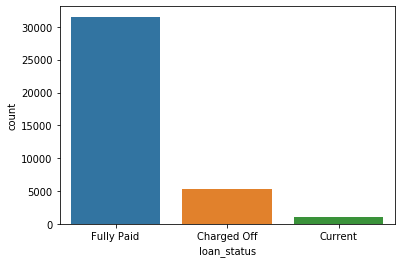

In [61]:
# Plot the distibution across various types of loan_status
sns.countplot(data=loan_df, x="loan_status")
plt.show()

As we can see that the loan status "Current" contributes very less, and won't be significant in our analysis as we won't be able to get any insight on the default rate as it is not fully paid or not defaulted.
<br>
So we are keeping only loan status which comes under ```Charged Off``` or ```Fully Paid```.

In [62]:
# Filter dataset to contain only Charged Off and Fully Paid loan status
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df = loan_df.reset_index(drop=True)

In [63]:
# Calculate the default rate
round(len(loan_df[loan_df.loan_status == "Charged Off"]) / len(loan_df.index) * 100, 2)

14.31

The percentage of outstanding loans where the lender has written off (__default rate__) for the given data is ```14.31%```

Let's analyse the distribution of other categorical variables across loan_status. In-order to find the relationship between these variables and default_rate we will create a new column based on the loan_status.
- 0 :Full Paid
- 1: Charged Off

In [64]:
# Create a new column which represents the numeric representation ofloan_status
loan_df["default_rate"] = loan_df.loan_status.apply(lambda x: 1 if x == "Charged Off" else 0)

In [65]:
# Confirming the logic
loan_df[["loan_status", "default_rate"]].head()

,loan_status,default_rate
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Fully Paid,0


# Univariate and Segmented Univariate Analyis

###### 1. loan_status column:

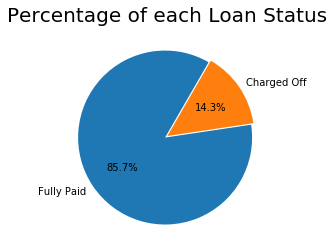

percentage of Loan borrowers who Fully Paid = 85.7%
percentage of Loan borrowers who defaulted = 14.3%


In [66]:
x = loan_df.loan_status.value_counts()
explode = (0.03,0.001)
plt.pie(x, labels = x.index, autopct = '%1.1f%%' ,explode = explode, startangle = 60)
plt.title("Percentage of each Loan Status", fontsize=20)
plt.show()
print("percentage of Loan borrowers who Fully Paid = 85.7%")
print("percentage of Loan borrowers who defaulted = 14.3%")

###### 2. default_rate of loan_amount column:

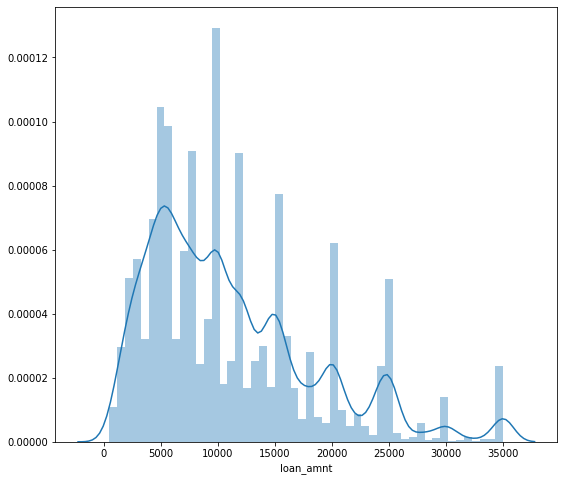

In [67]:
# Plot the distibution across loan_amnt
plt.figure(figsize=(9, 8))
sns.distplot(loan_df['loan_amnt'])
plt.show()

In [68]:
loan_df.loan_amnt.describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

We need to bin the continuous variables inorder to find a solid relationship between the default rates.

In [69]:
loan_df.groupby(by="loan_status").loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5266.0,12256.010254,8102.870621,1000.0,6000.0,10000.0,16987.5,35000.0
Fully Paid,31534.0,10964.766601,7223.862728,500.0,5500.0,9600.0,15000.0,35000.0


In [70]:
# Create a derived variable to store the bin in which the loan_amnt belongs to
loan_df["loan_amnt_bin"] = pd.cut(loan_df.loan_amnt, bins=np.arange(0, 36000, 5000), labels=["-".join([str(x), str(x+5)]) for x in range(0, 35, 5)])
loan_df.loan_amnt_bin.value_counts()

5-10     12190
0-5       8823
10-15     7433
15-20     4197
20-25     2745
30-35      720
25-30      692
Name: loan_amnt_bin, dtype: int64

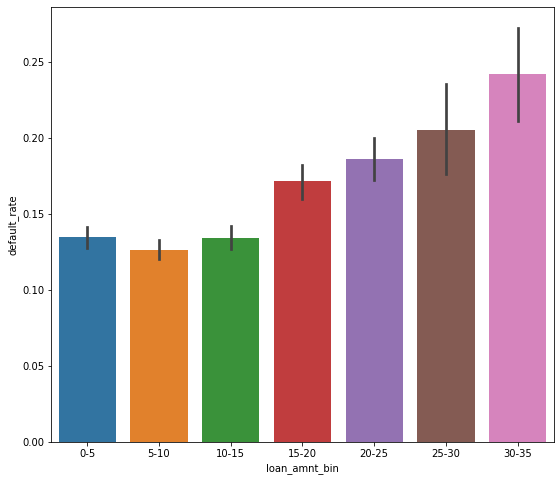

In [71]:
plt.figure(figsize=(9, 8))
sns.barplot(x="loan_amnt_bin", y="default_rate", data=loan_df)
plt.show()

__Observation__ :
- Most of the loan amount lies under 35000
- Higher the loan amount, higher the default rate
- Even though the number of loans for the higher amount is very less in number compared to the lower loan amount, it has got high level of risk of default.

###### 3. default_rate  of term columns:

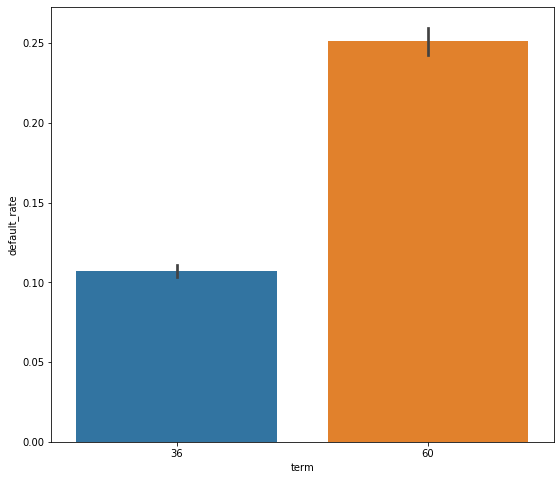

In [72]:
# Compare the column term with default_rate
plt.figure(figsize=(9, 8))
sns.barplot(x="term", y="default_rate", data=loan_df)
plt.show()

In [73]:
loan_df.groupby(by=["term", "loan_status"]).describe()

loan_amnt                                             \
                     count          mean          std     min     25%   
term loan_status                                                        
36   Charged Off    2943.0   9426.291199  6403.160038  1000.0  5000.0   
     Fully Paid    24603.0   9695.455839  6325.855385   500.0  5000.0   
60   Charged Off    2323.0  15840.970728  8597.558268  1000.0  9250.0   
     Fully Paid     6931.0  15470.444380  8328.511759  1000.0  9000.0   

                                            installment              \
                      50%      75%      max       count        mean   
term loan_status                                                      
36   Charged Off   8000.0  12000.0  35000.0      2943.0  312.593490   
     Fully Paid    8000.0  12500.0  35000.0     24603.0  314.383857   
60   Charged Off  15000.0  21000.0  35000.0      2323.0  371.941541   
     Fully Paid   14500.0  20000.0  35000.0      6931.0  351.722938   

                                                                        \
                         std    min      25%     50%      75%      max   
term loan_status                                                         
36   Charged Off  217.372686  30.71  158.495  260.59  406.660  1305.19   
     Fully Paid   209.096545  16.08  162.230  264.61  407.170  1295.21   
60   Charged Off  210.007383  22.79  210.480  347.80  496.125  1005.06   
     Fully Paid   199.353091  19.87  199.430  318.64  468.170   991.10   

                 emp_length                                                 \
                      count      mean       std  min  25%  50%   75%   max   
term loan_status                                                             
36   Charged Off     2943.0  4.658512  3.538263  0.0  2.0  4.0   8.0  10.0   
     Fully Paid     24603.0  4.765191  3.527347  0.0  2.0  4.0   8.0  10.0   
60   Charged Off     2323.0  5.664658  3.584213  0.0  3.0  5.0  10.0  10.0   
     Fully Paid      6931.0  5.566152  3.535808  0.0  3.0  5.0  10.0  10.0   

                 annual_inc                                               \
                      count          mean           std     min      25%   
term loan_status                                                           
36   Charged Off     2943.0  59794.160540  45167.393121  4080.0  36000.0   
     Fully Paid     24603.0  68755.292851  64907.487167  4000.0  40045.0   
60   Charged Off     2323.0  67631.242040  50422.513168  6000.0  42000.0   
     Fully Paid      6931.0  76543.195995  70694.859884  7200.0  47000.0   

                                                   dti                       \
                      50%      75%        max    count       mean       std   
term loan_status                                                              
36   Charged Off  50000.0  71942.0   840000.0   2943.0  13.644023  6.598990   
     Fully Paid   58800.0  82000.0  6000000.0  24603.0  12.972392  6.661306   
60   Charged Off  60000.0  80000.0  1250000.0   2323.0  14.517150  6.476138   
     Fully Paid   65000.0  90032.0  3900000.0   6931.0  14.092223  6.574235   

                                                   delinq_2yrs            \
                  min    25%    50%     75%    max       count      mean   
term loan_status                                                           
36   Charged Off  0.0  8.635  13.99  18.875  29.85      2943.0  0.170574   
     Fully Paid   0.0  7.790  12.96  18.210  29.99     24603.0  0.140593   
60   Charged Off  0.0  9.990  14.84  19.740  29.45      2323.0  0.162721   
     Fully Paid   0.0  9.180  14.24  19.250  29.89      6931.0  0.149906   

                                                     inq_last_6mths            \
                       std  min  25%  50%  75%   max          count      mean   
term loan_status                                                                
36   Charged Off  0.507715  0.0  0.0  0.0  0.0   5.0         2943.0  1.050629 

__Observation__: default rate is more in ```60 months``` than 36 months.

###### 4. default_rate of grade columns:

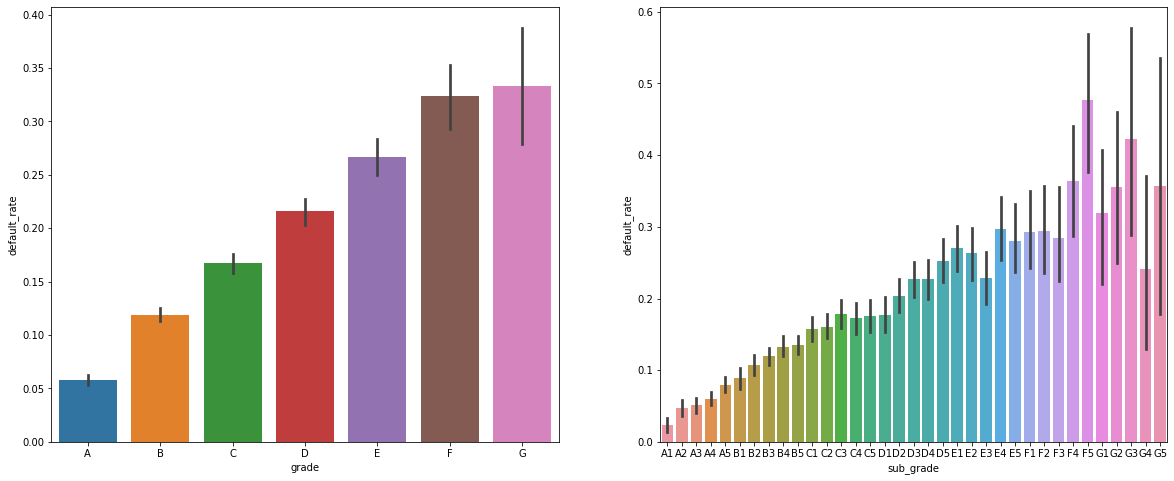

In [74]:
# Compare the column grade with default_rate
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.barplot(x="grade", y="default_rate", data=loan_df, order=loan_df.grade.sort_values().unique())
plt.subplot(1,2,2)
sns.barplot(x="sub_grade", y="default_rate", data=loan_df, order=loan_df.sub_grade.sort_values().unique())
plt.show()

__Observation__: <br>
- Default rate increases with Grades which implies high the interest rate more the defaulters
- Sames applies for subgrades too

###### 5. default_rate of purpose columns:

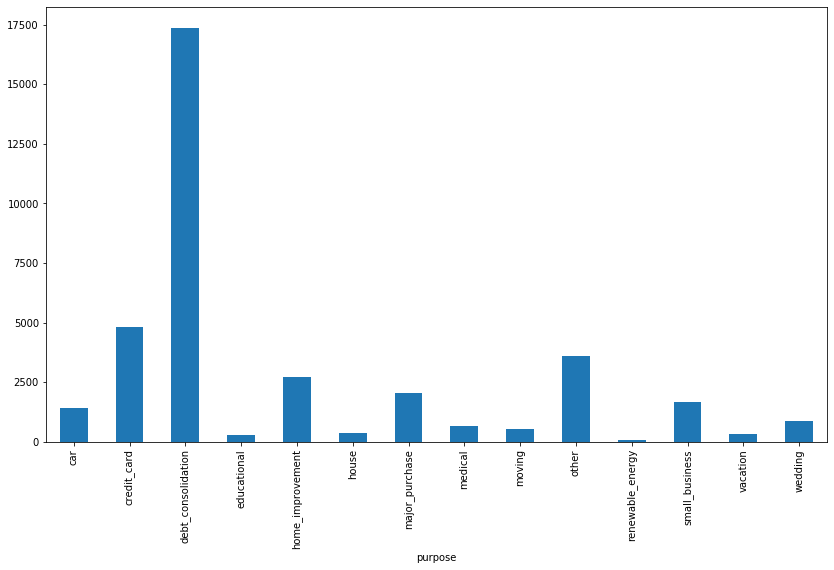

In [75]:
# purpose column frequency
plt.figure(figsize=(14, 8))
loan_df.groupby("purpose").purpose.count().plot.bar()
plt.show()

In [76]:
loan_df.groupby("purpose").purpose.count().sort_values(ascending=False)

purpose
debt_consolidation    17373
credit_card            4799
other                  3595
home_improvement       2734
major_purchase         2055
small_business         1656
car                    1429
wedding                 893
medical                 645
moving                  541
house                   349
vacation                341
educational             296
renewable_energy         94
Name: purpose, dtype: int64

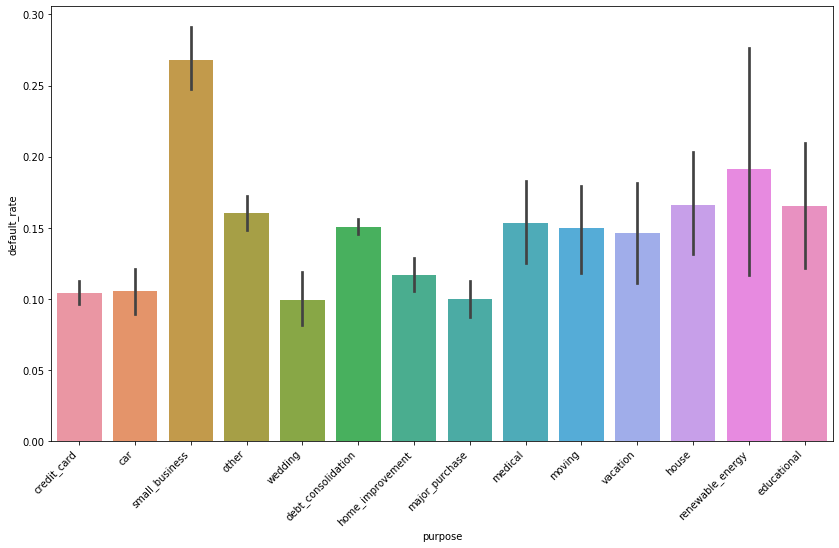

In [77]:
# Compare the column purpose with default_rate
plt.figure(figsize=(14, 8))
plot = sns.barplot(x="purpose", y="default_rate", data=loan_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

**Observation**:

- Maximum number of loans applied for ```Debt consolidation``` purposes
- ```Small Business``` loans shows the highest default rate


###### 6. default_rate of verification_status column:

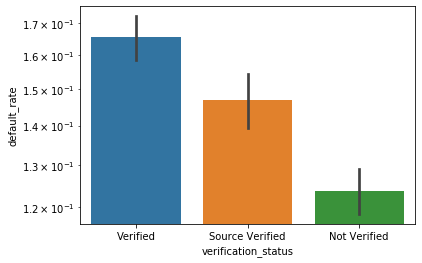

In [78]:
# Compare the column verification_status with default_rate
plot = sns.barplot(x="verification_status", y="default_rate", data=loan_df)
plot.set(yscale="log")
plt.show()

__Observation__: default rate is more where income was ```Verified``` by LC

###### 7. default_rate of home_ownership column:

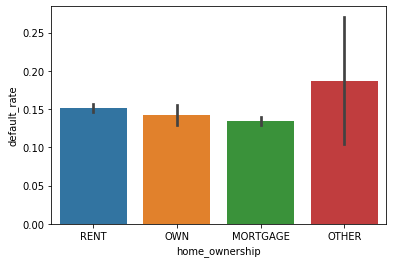

In [79]:
# Compare the column home_ownership with default_rate
plot = sns.barplot(x="home_ownership", y="default_rate", data=loan_df)
plt.show()

__Observation__: default rate is more in ```Other``` home-ownership type.

###### 8. default_rate of dti column:

In [80]:
loan_df.dti.describe()

count    36800.000000
mean        13.334529
std          6.650154
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [81]:
loan_df["dti_bin"] = pd.cut(loan_df.dti, bins=np.arange(0, 31, 10), labels=["low", "medium", "high"])
loan_df.dti_bin.value_counts()

medium    17678
low       12053
high       6924
Name: dti_bin, dtype: int64

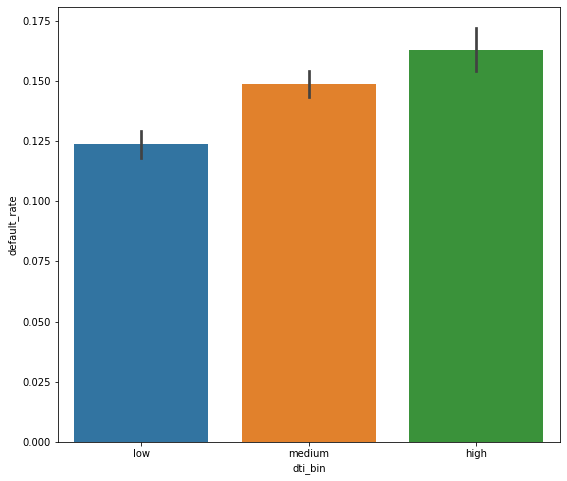

In [82]:
plt.figure(figsize=(9, 8))
sns.barplot(x="dti_bin", y="default_rate", data=loan_df)
plt.show()

__Observation__: As expected ```higher debt to income``` results in ```higher default rates```


###### 9. default_rate of installment column:

In [83]:
loan_df.installment.describe()

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64

In [84]:
loan_df["installment_bin"] = pd.cut(loan_df.installment, bins=np.arange(0, 1400, 300), labels=["low", "medium", "high", "very high"])
loan_df.installment_bin.value_counts()

low          19545
medium       13196
high          3547
very high      454
Name: installment_bin, dtype: int64

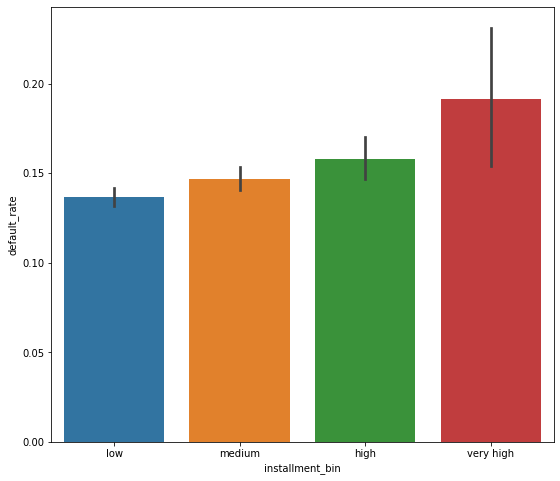

In [85]:
plt.figure(figsize=(9, 8))
sns.barplot(x="installment_bin", y="default_rate", data=loan_df)
plt.show()

__Observation__: As the ```installment amount``` increases, the ```default rate``` also increases even-though the number of loans having higher installment amount is less in number.

###### 10. default_rate of annual_inc column:

In [86]:
loan_df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).apply("{0:.2f}".format)

count      36800.00
mean       69434.48
std        64021.59
min         4000.00
10%        30000.00
25%        41133.00
50%        60000.00
75%        83000.00
90%       116738.90
max      6000000.00
Name: annual_inc, dtype: object

In [87]:
# Finding the maximum value within 3 std to create proper buckets
loan_df[np.abs(loan_df.annual_inc - loan_df.annual_inc.mean()) <= (3 * loan_df.annual_inc.std())].annual_inc.describe()

count     36533.000000
mean      66505.856085
std       36332.135273
min        4000.000000
25%       41000.000000
50%       59670.000000
75%       82000.000000
max      260735.000000
Name: annual_inc, dtype: float64

In [88]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=200000:
        return 'high'
    else:
        return 'very high'

loan_df['annual_inc_bin'] = loan_df['annual_inc'].apply(lambda x: annual_income(x))

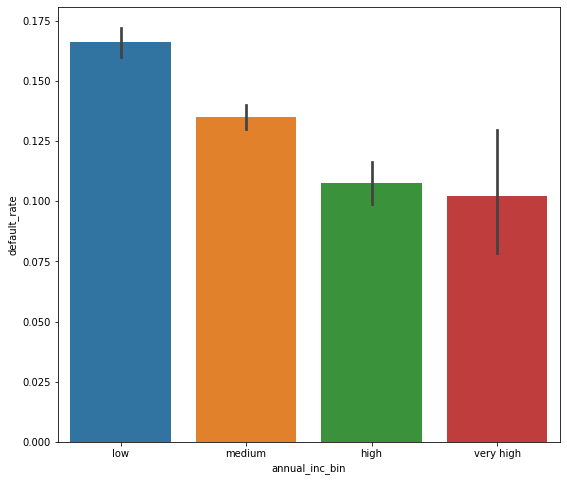

In [89]:
plt.figure(figsize=(9, 8))
sns.barplot(x="annual_inc_bin", y="default_rate", data=loan_df)
plt.show()

__Observation__: 
- Lower the annual income, higher the default rate

###### 11. default_rate of emp_length column:

In [90]:
loan_df.emp_length.value_counts()

10    8368
0     4329
2     4202
3     3947
4     3290
5     3157
1     3071
6     2133
7     1686
8     1408
9     1209
Name: emp_length, dtype: int64

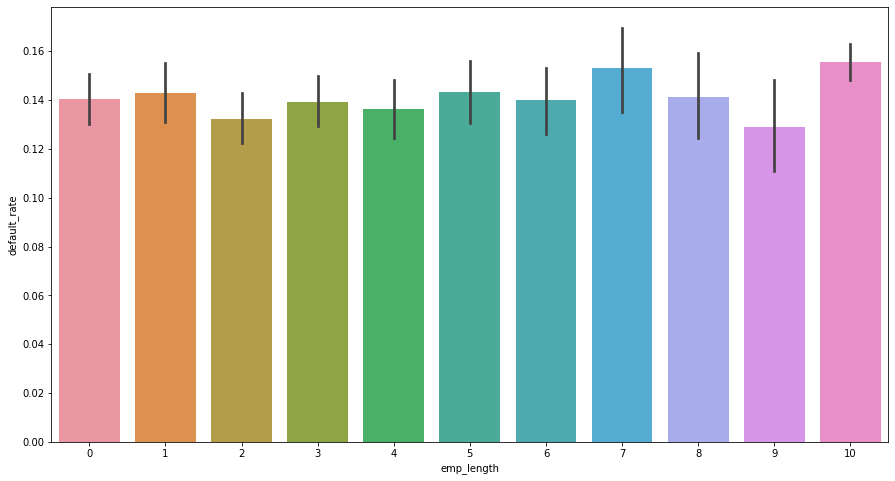

In [91]:
# Compare the column emp_length with default_rate
plt.figure(figsize=(15, 8))
sns.barplot(x="emp_length", y="default_rate", data=loan_df, order=loan_df.emp_length.sort_values().unique())
plt.show()

__Observation__: 
- emp_length is not providing any valuable insights

###### 12. default_rate of earliest_cr_line column:

In [92]:
#month doesn't give any insight, so analysing for only year of earliest_cr_line
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year

In [93]:
loan_df.earliest_cr_line_year.describe()

count    36800.000000
mean      1996.762636
std          6.625604
min       1946.000000
25%       1994.000000
50%       1998.000000
75%       2001.000000
max       2008.000000
Name: earliest_cr_line_year, dtype: float64

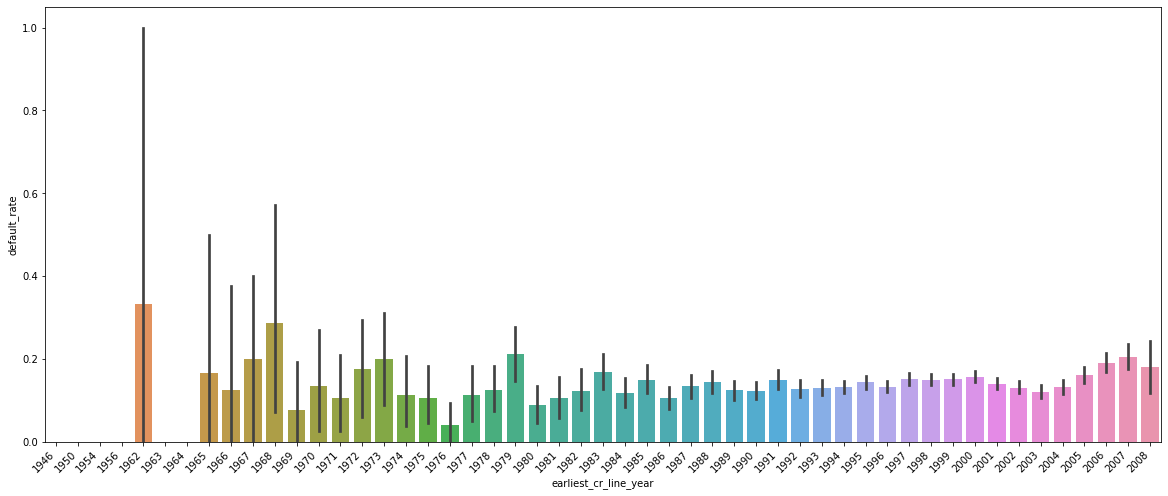

In [94]:
plt.figure(figsize=(20, 8))
plot = sns.barplot(x="earliest_cr_line_year", y="default_rate", data=loan_df, order=loan_df.earliest_cr_line_year.sort_values().unique())
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

__Observation__: 
- No significant changes in recent 10-15 years, we can ignore this feature for future defaulters analysis

###### 13. default_rate of delinq_2yrs column:

In [95]:
loan_df.delinq_2yrs.value_counts()

0     32810
1      3063
2       634
3       198
4        56
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

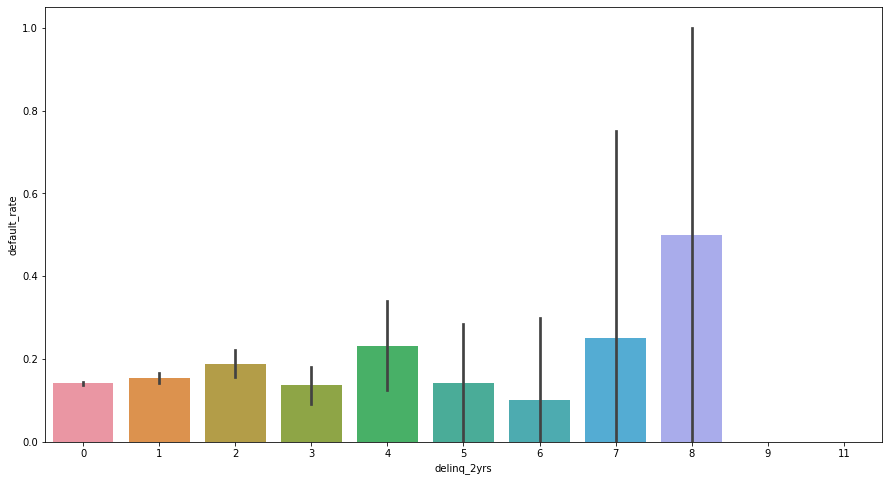

In [96]:
plt.figure(figsize=(15, 8))
plot = sns.barplot(x="delinq_2yrs", y="default_rate", data=loan_df, order=loan_df.delinq_2yrs.sort_values().unique())

__Observation__: 
- There is no significant increase in the default rate as number of deling_2yrs increase, however there is sharp rise when deling_2yrs is 8 times

###### 14. default_rate of inq_last_6mths column:

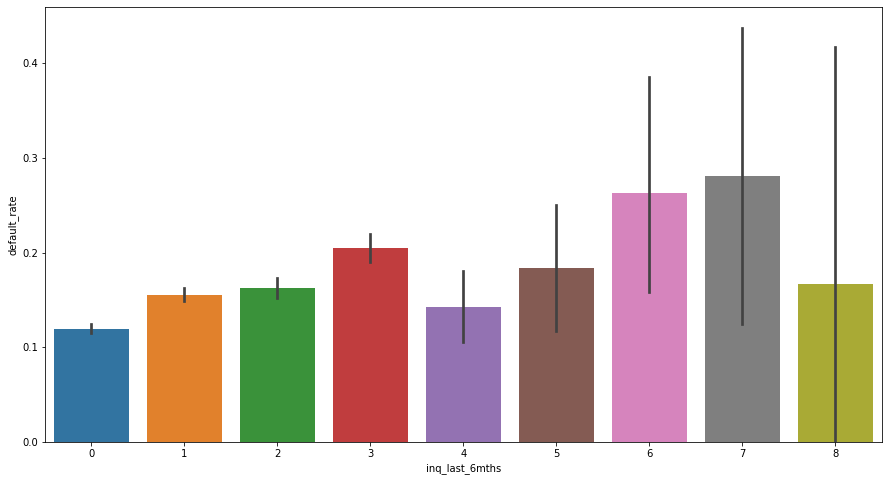

In [97]:
plt.figure(figsize=(15, 8))
plot = sns.barplot(x="inq_last_6mths", y="default_rate", data=loan_df, order=loan_df.inq_last_6mths.sort_values().unique())

__Observation__: 
- There is no significant increase in the default rate as number of inq_last_6months increases, so this won't provide valuable insight

###### 15. default_rate of open_acc column:

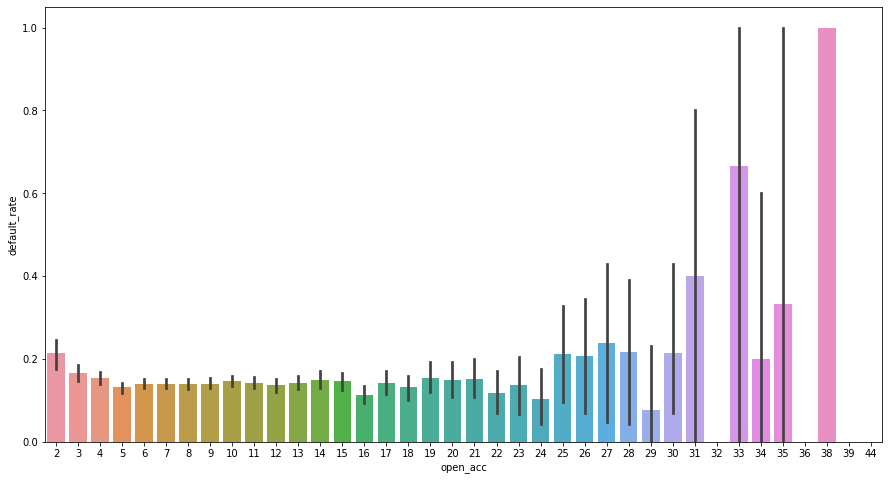

In [98]:
plt.figure(figsize=(15, 8))
plot = sns.barplot(x="open_acc", y="default_rate", data=loan_df, order=loan_df.open_acc.sort_values().unique())

__Observation__: 
- There is no significant increase in the default rate as number of opn_acc increases, so this won't provide any valuable insight

###### 16. default_rate of pub_rec columns:

In [99]:
loan_df.groupby(["default_rate","pub_rec_bankruptcies"]).pub_rec_bankruptcies.count()

default_rate  pub_rec_bankruptcies
0             0.0                     30337
              1.0                      1194
              2.0                         3
1             0.0                      4929
              1.0                       335
              2.0                         2
Name: pub_rec_bankruptcies, dtype: int64

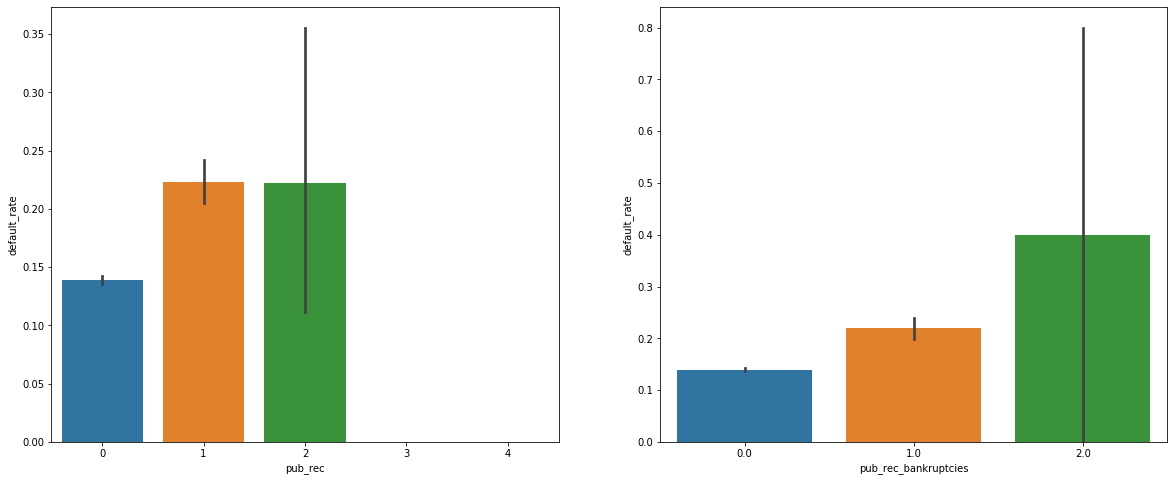

In [100]:
# Compare the column grade with default_rate
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.barplot(x="pub_rec", y="default_rate", data=loan_df, order=loan_df.pub_rec.sort_values().unique())
plt.subplot(1,2,2)
sns.barplot(x="pub_rec_bankruptcies", y="default_rate", data=loan_df, order=loan_df.pub_rec_bankruptcies.sort_values().unique())
plt.show()

__Observation__: 
- There is no significant increase in the default rate as number of derrogatory public records(```pub_rec```) increases, so this won't provide any valuable insight
- ```pub_rec_bankrupcies``` have positive correlation with default rate

###### 17. default_rate of total_acc columns:

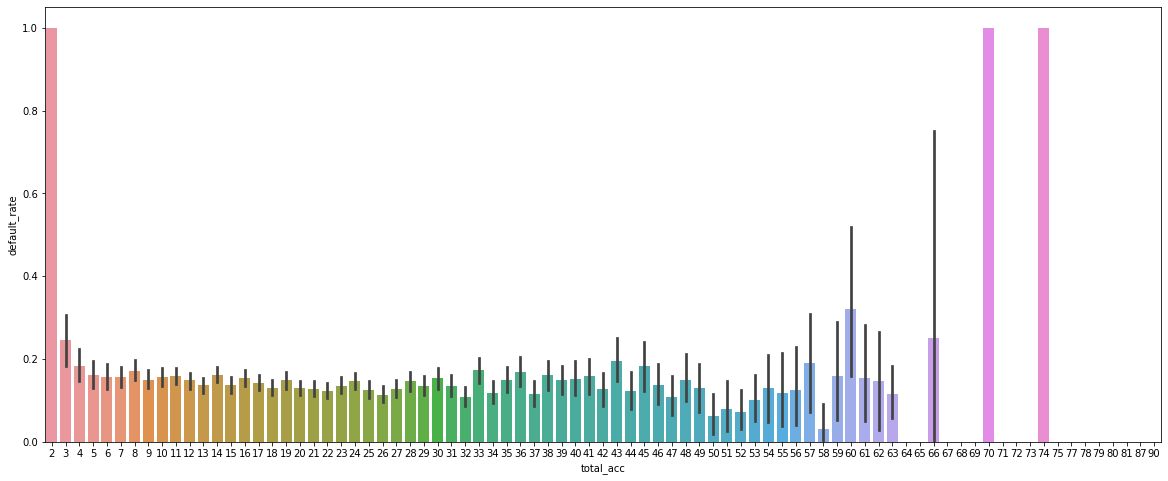

In [101]:
plt.figure(figsize=(20, 8))
plot = sns.barplot(x="total_acc", y="default_rate", data=loan_df, order=loan_df.total_acc.sort_values().unique())
plt.show()

__Observation__: 
- There is no significant trend between total_acc and default_rate

###### 18. default_rate of revol_util columns:

In [102]:
loan_df.revol_util.describe()

count    36800.000000
mean        48.992830
std         28.313209
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

In [103]:
loan_df["revol_util_bin"] = pd.cut(loan_df.revol_util, bins=np.arange(-5, 105, 5), labels=["-".join([str(x), str(x+5)]) for x in range(-5, 100, 5)])
loan_df.revol_util_bin.value_counts(dropna=False)

45-50     2071
55-60     2041
60-65     1997
65-70     1974
50-55     1971
40-45     1968
35-40     1913
70-75     1894
30-35     1893
75-80     1854
80-85     1810
25-30     1785
20-25     1744
85-90     1644
5-10      1633
15-20     1629
0-5       1615
90-95     1587
10-15     1519
95-100    1375
-5-0       883
Name: revol_util_bin, dtype: int64

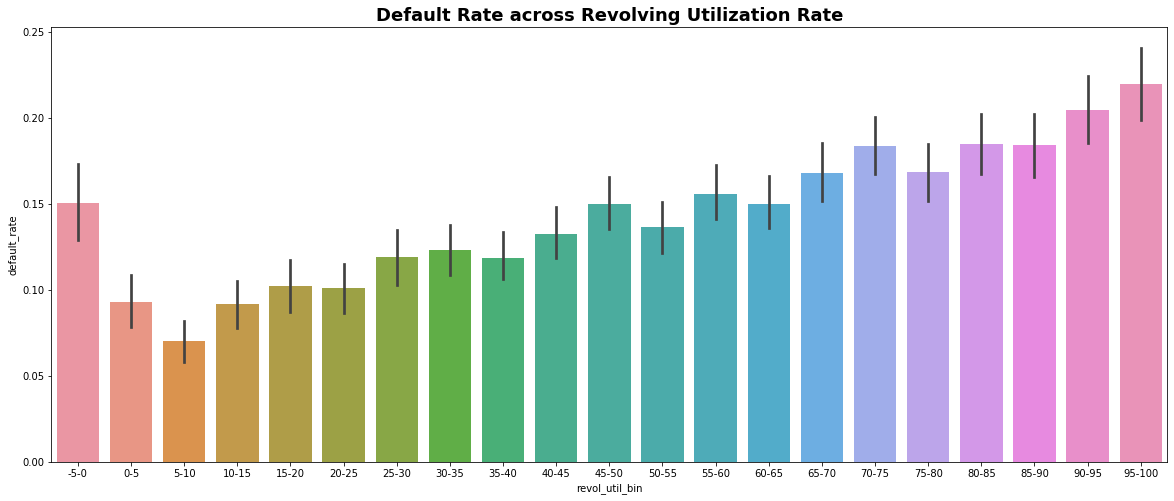

In [104]:
plt.figure(figsize=(20, 8))
plt.title("Default Rate across Revolving Utilization Rate", weight='bold').set_fontsize('18')
plot = sns.barplot(x="revol_util_bin", y="default_rate", data=loan_df, order=loan_df.revol_util_bin.sort_values().unique())
plt.show()

__Observation__: 
- Higher the revol_util ratio, higher the default rate

***

# Bivariate Analyis

###### 1. Loan Amount and annual_inc

<Figure size 648x576 with 0 Axes>

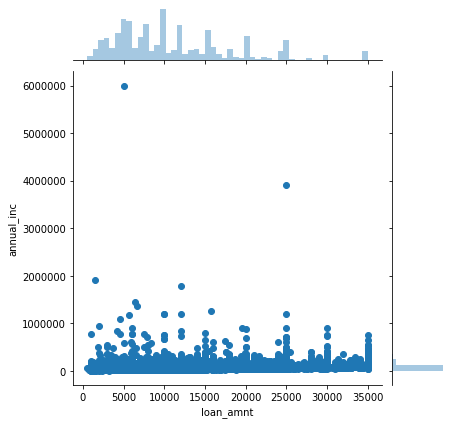

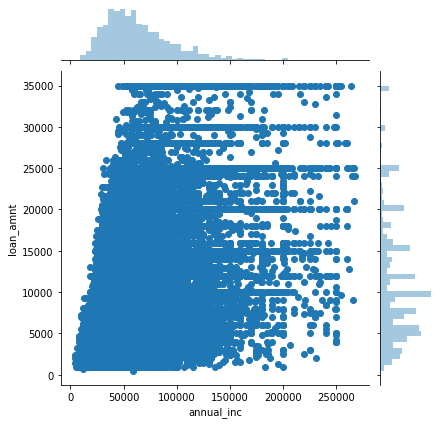

In [105]:
plt.figure(figsize=(9, 8))
sns.jointplot("loan_amnt", "annual_inc", data=loan_df)
plt.show()
# Plotting the same graph with lower annual_income bucket to get more clarity
sns.jointplot("annual_inc", "loan_amnt", loan_df.loc[loan_df["annual_inc"] < 270000])
plt.show()

__Observation__:
- Lower salaried persons are also taking loans of larger amount compared to their annual income. These can become risky loans.

###### 2. Loan Amount, Loan Status and Grade

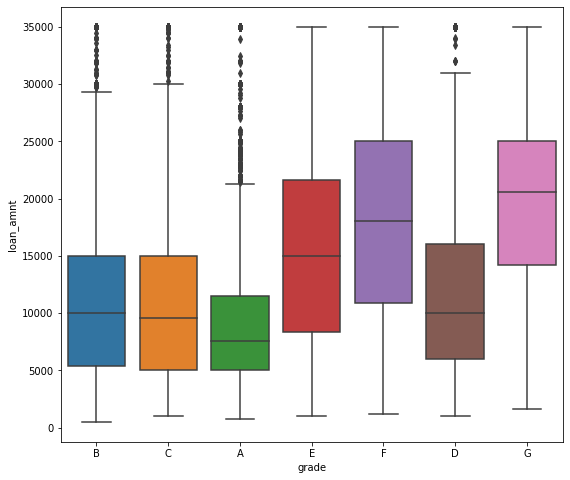

In [106]:
plt.figure(figsize=(9, 8))
sns.boxplot(x="grade", y="loan_amnt", data=loan_df)
plt.show()

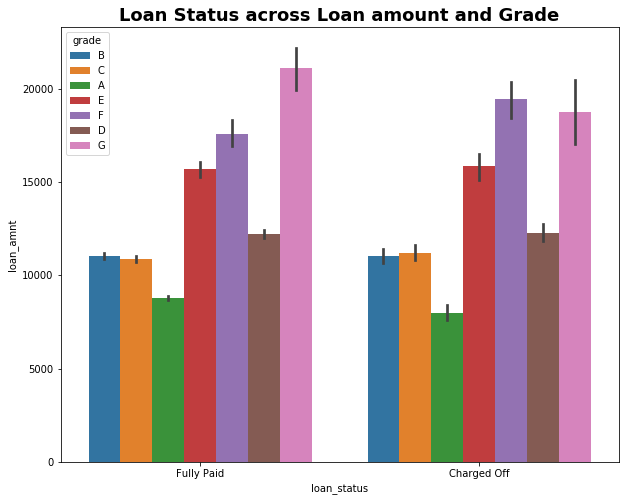

In [107]:
plt.figure(figsize=(10, 8))
plt.title("Loan Status across Loan amount and Grade", weight='bold').set_fontsize('18')
sns.barplot(x="loan_status", y="loan_amnt", hue="grade", data=loan_df)
plt.show()

__Observation__:
- For the loan grade assigned by the LC, higher loan amounts got the grade G(higher interest rate) whereas the lower amount comes under A, B C and D (lower interest rate).
- LC assigned grade F & G (higher interest rates) got the highest default rate compared to the A, B and C grades (low interest rates),

###### 3. Loan Status, Loan Amount and Verification Status

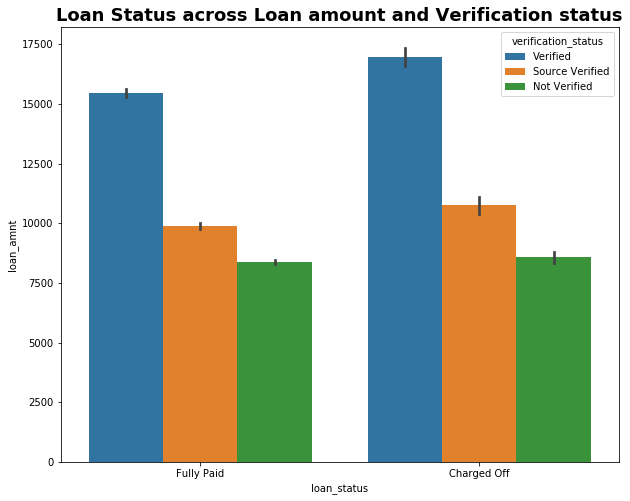

In [108]:
plt.figure(figsize=(10, 8))
plt.title("Loan Status across Loan amount and Verification status", weight='bold').set_fontsize('18')
sns.barplot(x="loan_status", y="loan_amnt", hue="verification_status", data=loan_df)
plt.show()

__Observation__
- As we seen in the univariate analysis, higher loans amounts amount has got higher default rates
- In addition to that, higher loan amounts which are verified by LC are also getting charged off.

###### 4. Loan Status, Loan Amount and Term

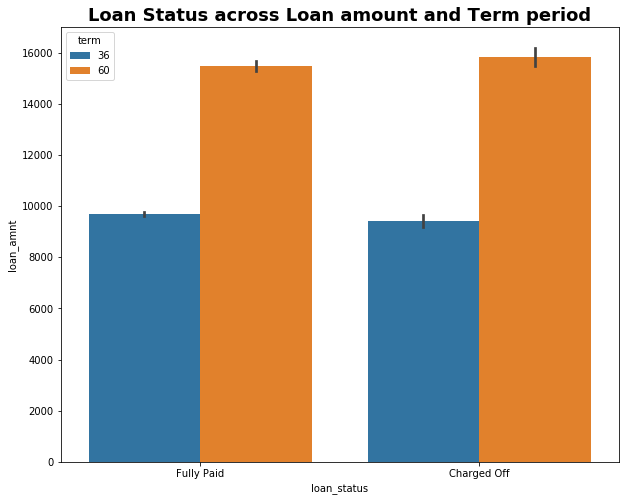

In [109]:
plt.figure(figsize=(10, 8))
plt.title("Loan Status across Loan amount and Term period", weight='bold').set_fontsize('18')
sns.barplot(x="loan_status", y="loan_amnt", hue="term", data=loan_df)
plt.show()

__Observation__
- Higher loan amounts usually comes with larger term period, and also got higher risk rates.

###### 5. Loan Status, term and revol_util

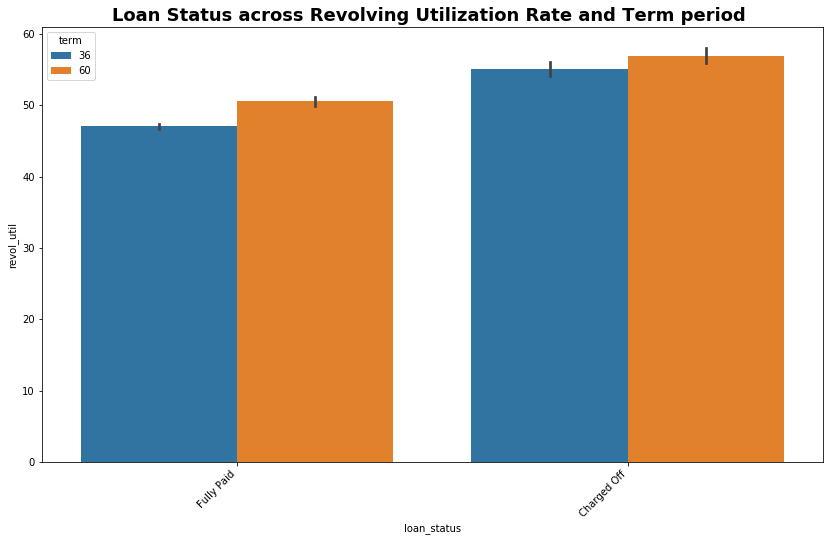

In [110]:
plt.figure(figsize=(14, 8))
plt.title("Loan Status across Revolving Utilization Rate and Term period ", weight='bold').set_fontsize('18')
plot = sns.barplot(x="loan_status", y="revol_util", hue="term", data=loan_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

__Observation__
- Loans having higher term period with larger revol_util has got more risk rates

###### 6. Loan Status, grade and revol_util

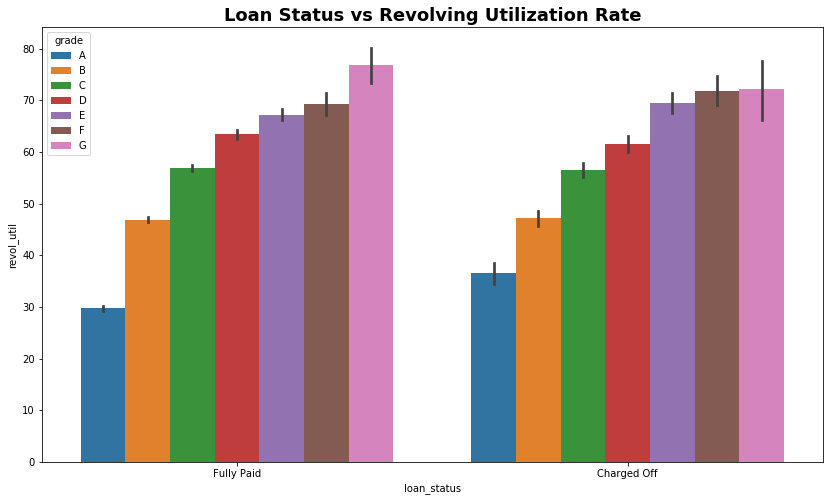

In [111]:
plt.figure(figsize=(14, 8))
plt.title("Loan Status vs Revolving Utilization Rate", weight='bold').set_fontsize('18')
sns.barplot(x="loan_status", y="revol_util", hue="grade", data=loan_df, hue_order=loan_df.grade.sort_values().unique())
plt.show()

__Observation__
- As grade changes from A to G (interest increases), the revol_util also increases
- Higher interest rates for loans having higer risk rates

###### 7. Purpose, default_rate and term

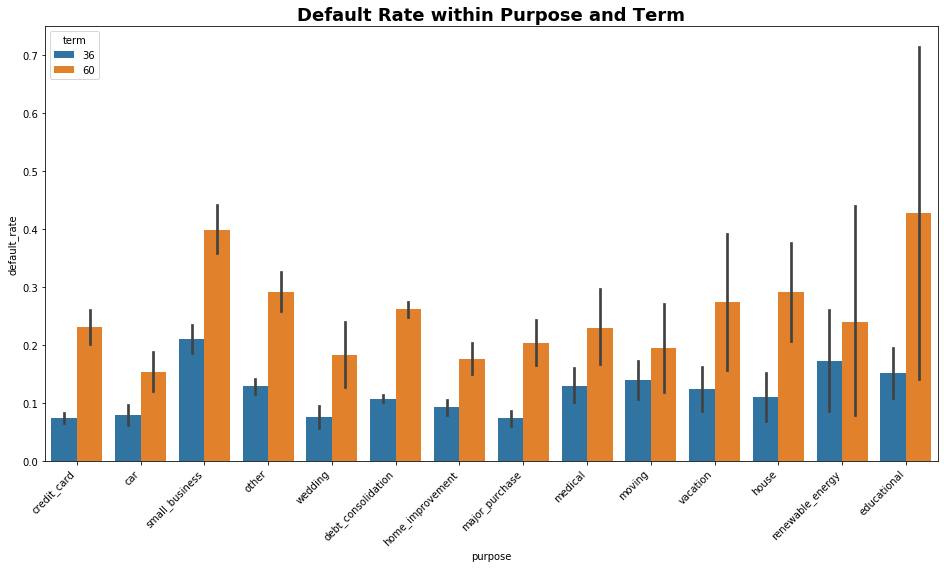

In [112]:
plt.figure(figsize=(16, 8))
plot = sns.barplot(x="purpose", y="default_rate", hue="term", data=loan_df)
plt.title("Default Rate within Purpose and Term", weight='bold').set_fontsize('18')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

__Observation__
- Higher term loans taken for small_business, educational, other and house purposes has got higher risk rates.

###### 8. Annual Income, default_rate and grade

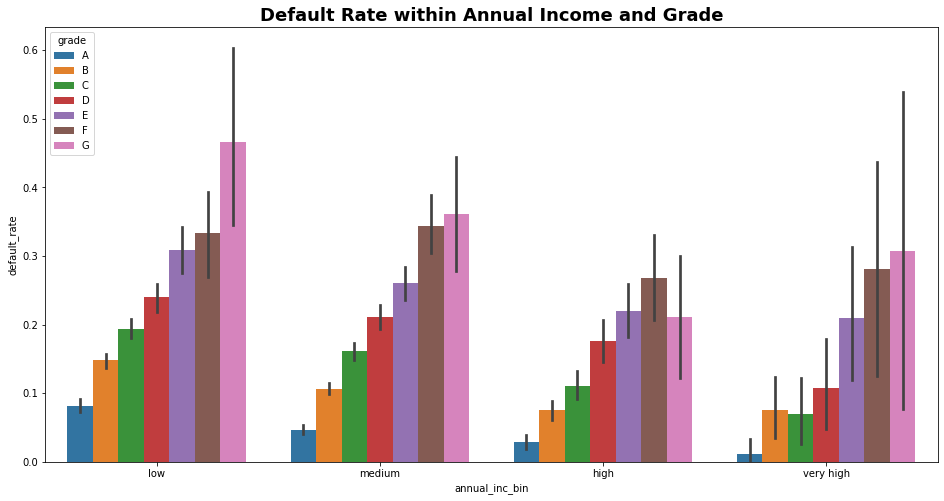

In [113]:
plt.figure(figsize=(16, 8))
plt.title("Default Rate within Annual Income and Grade", weight='bold').set_fontsize('18')
plot = sns.barplot(x="annual_inc_bin", y="default_rate", hue="grade", data=loan_df, hue_order=loan_df.grade.sort_values().unique())
plt.show()

__Observation__
- As the interest rate increases within the low and medium income groups, the default rate also increases

###### 9. home ownership, purpose and default rate

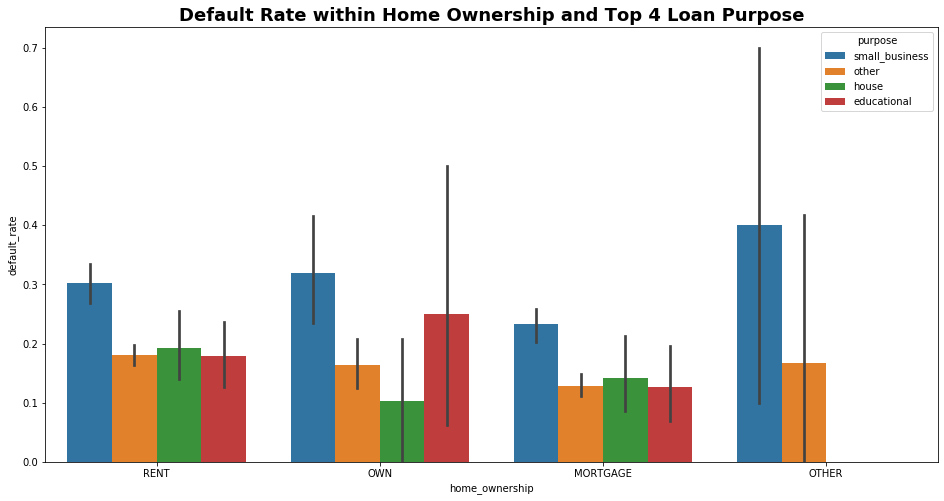

In [114]:
# Filtering out only the top 4 purpose based on default rates
loan_sub_df = loan_df[loan_df.purpose.isin(["small_business", "educational", "other","house"])]
plt.figure(figsize=(16, 8))
plt.title("Default Rate within Home Ownership and Top 4 Loan Purpose", weight='bold').set_fontsize('18')
sns.barplot(x="home_ownership", y="default_rate", hue="purpose", data=loan_sub_df)
plt.show()

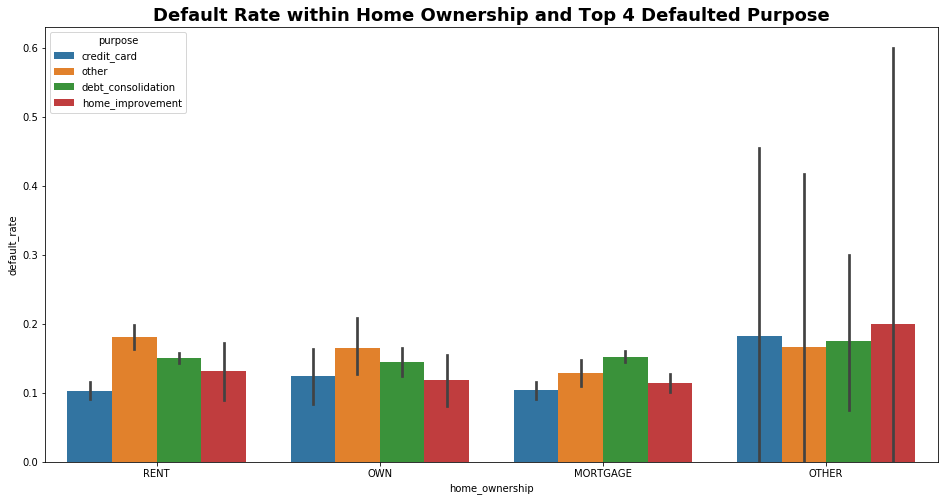

In [115]:
# Filtering out only the top 4 purpose based on maximum number of loans applied.
loan_sub_df = loan_df[loan_df.purpose.isin(["debt_consolidation", "credit_card", "other","home_improvement"])]
plt.figure(figsize=(16, 8))
plt.title("Default Rate within Home Ownership and Top 4 Defaulted Purpose", weight='bold').set_fontsize('18')
sns.barplot(x="home_ownership", y="default_rate", hue="purpose", data=loan_sub_df)
plt.show()

__Observation__
- Based on the number of loans applied, ```debt_consolidation``` has got the maximun default rate
- Based on the default rate across all the purpose applied, ```small business``` has got the highest rate

### Continuous variables Analysis

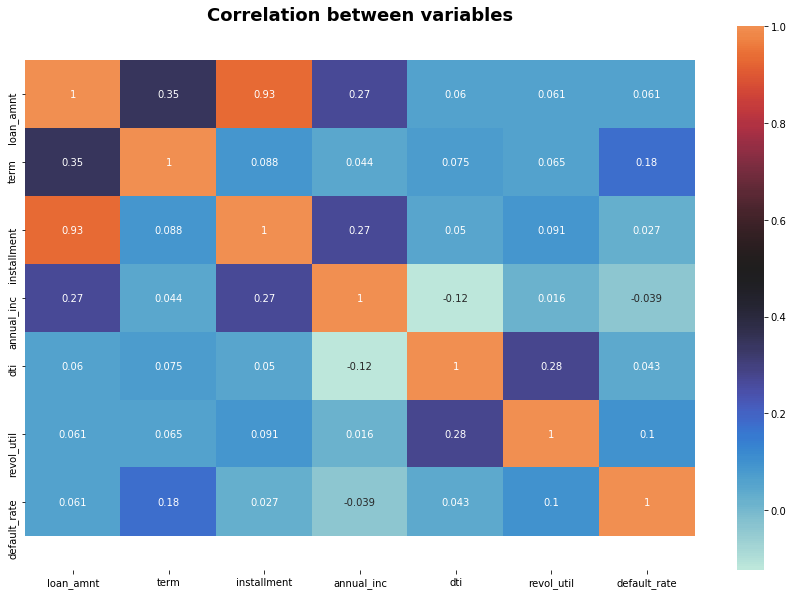

In [116]:
# Heat map to understand the relationship between variables which affect default_rates
plt.figure(figsize=(15,10))
plt.title("Correlation between variables", weight='bold').set_fontsize('18')
nec_col = ["loan_amnt", "term", "installment", "annual_inc", "dti", "revol_util", "default_rate"]
corr = loan_df[nec_col].corr()
ax = sns.heatmap(corr, annot=True, center=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

__Observation__
- default_rate has higher correlations with term and revol_util
- term has higher correlation with loan_amount, whereas revol_util with dti
- loan_amount has highest correlation with installment

***

### Conclusions

- Loans which comes under ```small business``` and ```educational purpose``` tend to have higher risk rate of being defaulted.
- Loans that were borrowed by ```low income category``` had more chances of becoming a bad loan.
- The low income category has got higher interest rates except for most of the loan applications except small business, medical.
- Most of the loans applied to LC is for ```debt consolidation```.
- The least purposes loan applied to LC is ```renewable energy```.
- Most driving factors for bad loan: ```purpose```, ```annual income```, ```term```, ```grade``` and ```debt to income ratio```.
- Low grade loans have a high tendency to default.

### Recommendations

- Increase verification criteria for approving loans with ```highest loan amount```.
- Reduce the number of loan approvals where purpose is ```small business``` with ```60 months``` term period.
- Reduce the approvals of high-value loans when revolving the utilization rate is greater than 80%.
- Extra scrutiny for high loan amount with ```high interest rates```, as the risk rate is very high.
- Increase verification criteria for approving loans to ```low income applicants``` for all grade types.

***